In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("glassdoor_jobs.csv",index_col="Unnamed: 0")
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


#  DATA CLEANING


In [3]:
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 112.0+ KB


In [5]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])


In [6]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])


In [7]:
(df['Competitors'] == '-1').value_counts()

Competitors
True     634
False    322
Name: count, dtype: int64

In [8]:
df['Competitors'] = df['Competitors'].replace('-1', 'No Competitors')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 112.0+ KB


In [10]:
df['Min Salary']=df['Salary Estimate'].apply(lambda x:x.split("-")[0])
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),No Competitors,$53K
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),No Competitors,$63K
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),No Competitors,$80K
3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",$56K
4,Data Scientist,$86K-$143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$86K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,Senior Data Engineer,$72K-$133K,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",$72K
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,No Competitors,$56K
953,Data Science Manager,$95K-$160K,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),No Competitors,$95K
954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom,


In [11]:
df['Max Salary']=df['Salary Estimate'].apply(lambda x:x.split("-")[1])


In [12]:
df['Founded'] = df['Founded'].replace(-1, np.nan)
df['Job Title'] = df['Job Title'].replace(-1, np.nan)
df["Rating"] = df['Rating'].replace(-1, np.nan)
df['Company Name'] = df['Company Name'].replace(-1, np.nan)
df['Location'] = df['Location'].replace(-1, np.nan)
df['Revenue'] = df['Revenue'].replace("Unknown / Non-Applicable", np.nan)
df['Sector'] = df['Sector'].replace(-1, np.nan)
df['Industry'] = df['Industry'].replace(-1, np.nan)
df['Type of ownership'] = df['Type of ownership'].replace(-1, np.nan)
df['Salary Estimate'] = df['Salary Estimate'].replace('-1', np.nan)


In [13]:
list=["34 Per Hour","29 Per Hour","25 Per Hour","39 Per Hour","17 Per Hour","47 Per Hour"]
df['Max Salary'] = df['Max Salary'].replace(list,np.nan,regex=True) 
#df['Max Salary'] = df['Max Salary'].replace("34 Per Hour",np.nan)                                            
#df['Max Salary'] = df['Max Salary'].replace("29 Per Hour",np.nan)
#df['Max Salary'] = df['Max Salary'].replace("25 Per Hour",np.nan)
#df['Max Salary'] = df['Max Salary'].replace("39 Per Hour",np.nan)
#df['Max Salary'] = df['Max Salary'].replace("17 Per Hour",np.nan)
#df['Max Salary'] = df['Max Salary'].replace("47 Per Hour",np.nan)


In [14]:
df.isnull().sum()

Job Title              0
Salary Estimate      214
Job Description        0
Rating                34
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded               97
Type of ownership      0
Industry               0
Sector                 0
Revenue              299
Competitors            0
Min Salary             0
Max Salary            19
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(492, 16)

In [17]:
df['Founded']=df["Founded"].astype(int)

In [18]:
df['Min Salary']=df['Min Salary'].apply(lambda x:x.split('$')[1])
df['Max Salary']=df['Max Salary'].apply(lambda x:x.split('$')[1])



In [19]:
df['Min Salary'] = df['Min Salary'].str.replace('K', '000').astype(int)
df['Max Salary'] = df['Max Salary'].str.replace('K', '000').astype(int)

In [20]:
df['Location Code'] = df['Location'].apply(lambda x: x.split(',')[1])

In [21]:
df['Headquarters Code'] = df['Headquarters'].apply(lambda x: x.split(',')[1])

In [22]:
df['Size'] = df['Size'].str.replace(' to ', '-').str.replace(' employees', '').str.replace('+', '')

In [23]:
def calculate_average(size):
    if '-' in size:
        low, high = map(int, size.split('-'))
        return (low + high) // 2
    else:
        return int(size)
df['Avg Emp Size'] = df['Size'].apply(calculate_average)


In [24]:
for_pie=df.groupby("Type of ownership")["Avg Emp Size"].sum()

In [25]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Location Code,Headquarters Code,Avg Emp Size
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501-1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),No Competitors,53000,91000,NM,CA,750
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),No Competitors,63000,112000,MD,MD,10000
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501-1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),No Competitors,80000,90000,FL,FL,750
3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001-5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56000,97000,WA,WA,3000
5,Data Scientist,$71K-$119K,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX","Dallas, TX",201-500,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",71000,119000,TX,TX,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Data Engineer,$62K-$113K,Do you find data architecture exciting? Does b...,3.9,Fivestars,"San Francisco, CA","San Francisco, CA",201-500,2011,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Belly, SpotOn",62000,113000,CA,CA,350
949,"Principal, Data Science - Advanced Analytics",$86K-$137K,IQVIA is the leading human data science compan...,3.6,IQVIA,"Plymouth Meeting, PA","Durham, NC",10000,2017,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),"PPD, INC Research, PRA Health Sciences",86000,137000,PA,NC,10000
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",58000,111000,MA,United Kingdom,10000
951,Senior Data Engineer,$72K-$133K,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001-5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",72000,133000,TN,CA,3000


In [26]:
df["Average Salary"]= ((df['Min Salary'] + df['Max Salary']) / 2)

In [27]:
sec=df.groupby('Sector')["Avg Emp Size"].sum()

In [28]:
loc=df.groupby('Location')["Avg Emp Size"].sum()

loc_sorted=loc.sort_values(ascending=False)
top10=loc_sorted.head(10)


In [29]:
max_avg_emp_size_company = df.loc[df['Avg Emp Size'].idxmax()]['Company Name']

max_salary_company = df.loc[df['Avg Emp Size'] == df['Avg Emp Size'].max()]['Max Salary'].idxmax()
max_salary_company = df.loc[max_salary_company]['Company Name']

In [30]:
max_salary_company


'Liberty Mutual Insurance'

In [31]:
duplicates = df.duplicated().sum()
duplicates

185

In [32]:
df.drop_duplicates(inplace=True)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Location Code,Headquarters Code,Avg Emp Size,Average Salary
0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501-1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),No Competitors,53000,91000,NM,CA,750,72000.0
1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),No Competitors,63000,112000,MD,MD,10000,87500.0
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501-1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),No Competitors,80000,90000,FL,FL,750,85000.0
3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001-5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56000,97000,WA,WA,3000,76500.0
5,Data Scientist,$71K-$119K,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX","Dallas, TX",201-500,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",71000,119000,TX,TX,350,95000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,Data Scientist,$51K-$88K,Job Description Header 2 Data scientist Locati...,4.3,Solugenix Corporation,"Phoenix, AZ","Brea, CA",201-500,1969,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),No Competitors,51000,88000,AZ,CA,350,69500.0
884,Data Scientist (Warehouse Automation),$79K-$127K,"SoftBank Robotics, the global leader in workfo...",3.8,SoftBank Robotics,"San Francisco, CA","Paris, France",201-500,2005,Subsidiary or Business Segment,Consumer Products Manufacturing,Manufacturing,$25 to $50 million (USD),No Competitors,79000,127000,CA,France,350,103000.0
892,Jr. Data Scientist,$81K-$132K,MITRE\nis a trusted operator of federally fund...,3.2,MITRE,"McLean, VA","Bedford, MA",5001-10000,1958,Nonprofit Organization,Federal Agencies,Government,$1 to $2 billion (USD),"Battelle, General Atomics, SAIC",81000,132000,VA,MA,7500,106500.0
896,Data Architect / Data Modeler,$63K-$110K,Medidata: Conquering Diseases Together\n\nMedi...,4.3,Medidata Solutions,"New York, NY","New York, NY",1001-5000,1999,Company - Public,Enterprise Software & Network Solutions,Information Technology,$500 million to $1 billion (USD),Oracle,63000,110000,NY,NY,3000,86500.0


In [33]:
df.shape

(307, 20)

In [34]:
top_rated_companies = df[df['Rating'] > 4.7]
top_rated_companies

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Location Code,Headquarters Code,Avg Emp Size,Average Salary
2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501-1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),No Competitors,80000,90000,FL,FL,750,85000.0
177,Senior Data Analyst,$44K-$78K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501-1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),No Competitors,44000,78000,FL,FL,750,61000.0
255,Senior Research Statistician- Data Scientist,$76K-$125K,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",1001-5000,1925,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),No Competitors,76000,125000,WI,WI,3000,100500.0
468,Revenue Analytics Manager,$45K-$78K,HOVER uses patented technology making it possi...,4.8,HOVER,"San Francisco, CA","San Francisco, CA",51-200,2011,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),No Competitors,45000,78000,CA,CA,125,61500.0
542,Data Scientist,$75K-$127K,Title: Data Scientist\n\nLocation: Springfield...,5.0,Royce Geospatial,"Springfield, VA","Arlington, VA",51-200,2014,Company - Private,Aerospace & Defense,Aerospace & Defense,$10 to $25 million (USD),No Competitors,75000,127000,VA,VA,125,101000.0


In [35]:
data_scientist_positions = df[df['Job Title'].str.contains('Data Scientist')]
average_salary_by_position = data_scientist_positions.groupby('Job Title')['Average Salary'].mean()
average_salary_by_position

Job Title
Ag Data Scientist                                                                     80500.000000
Associate Data Scientist/Computer Scientist                                           81500.000000
Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad               74500.000000
Clinical Data Scientist                                                               84000.000000
College Hire - Data Scientist - Open to December 2019 Graduates                       81000.000000
Computational Chemist/Data Scientist                                                  76500.000000
Data Scientist                                                                       101729.508197
Data Scientist (Actuary, FSA or ASA)                                                 107000.000000
Data Scientist (Warehouse Automation)                                                103000.000000
Data Scientist - Bioinformatics                                                       67000.000000


#  EXPLORATORY DATA ANALYSIS

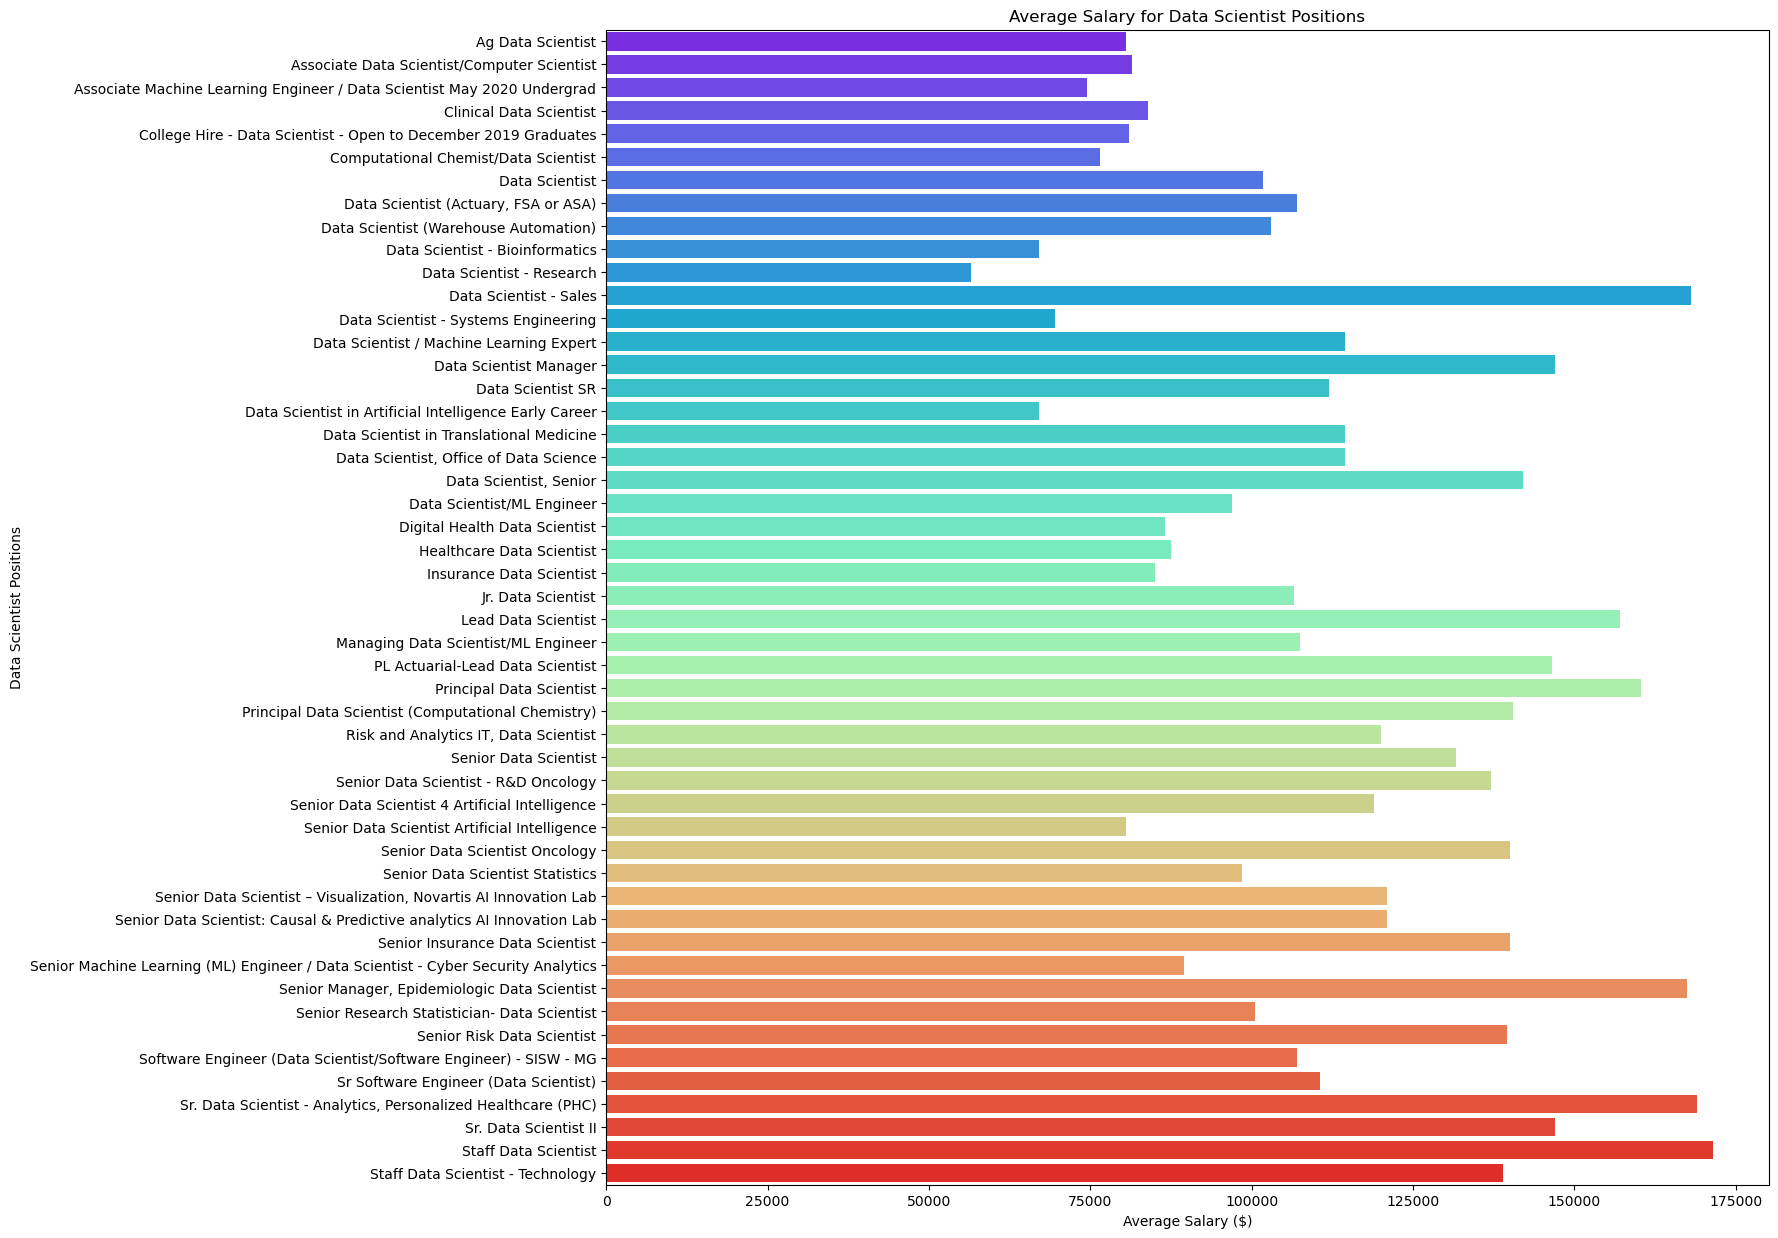

In [36]:
plt.figure(figsize=(15, 15))
sns.barplot(x=average_salary_by_position.values, y=average_salary_by_position.index, palette='rainbow')
plt.title('Average Salary for Data Scientist Positions')
plt.xlabel('Average Salary ($)')
plt.ylabel('Data Scientist Positions')
plt.show()

# highest paying data scientist role is in SALES DS, STAFF DS,HEALTHCARE DS

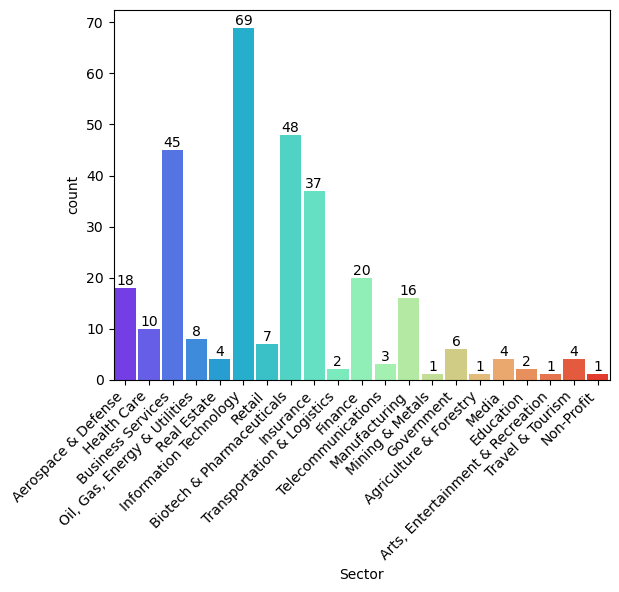

In [37]:
ax=sns.countplot(x='Sector',width=0.9,palette='rainbow',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for bars in ax.containers:
    ax.bar_label(bars)

From the above plot we can see that the Information Technology sector (105) has the largest number of companies in US followed by Biotech & Pharmaceuticals sector(85) and the least companies is from combined Mining & metals, Agricuture & forestory and Non-profit sector which is 1.

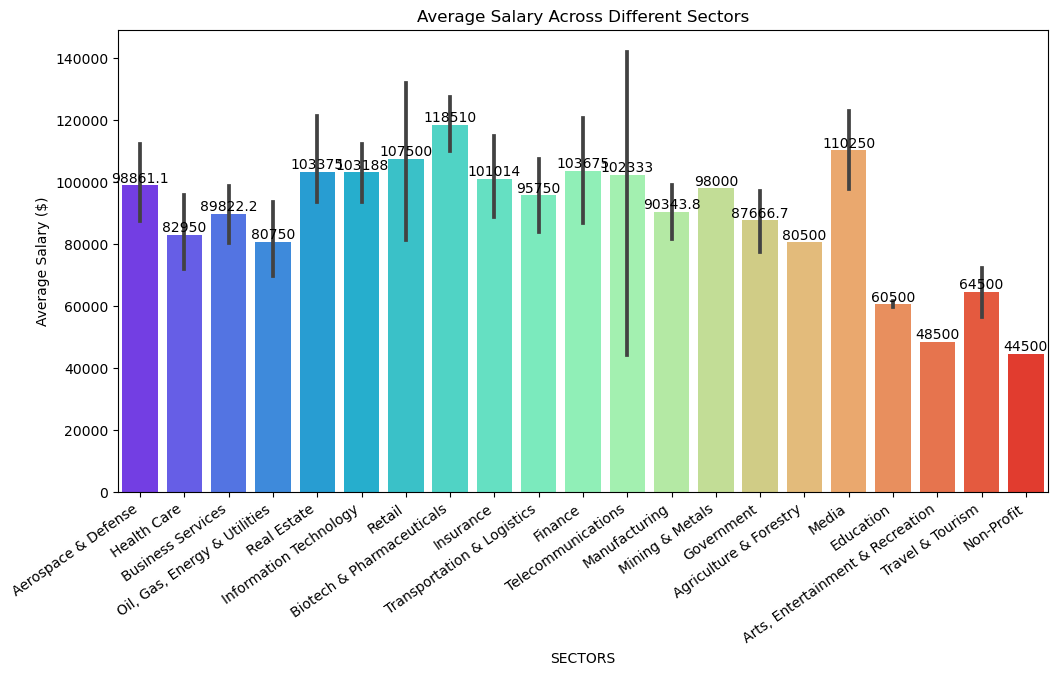

In [38]:
plt.figure(figsize=(12, 6))
ac=sns.barplot(x='Sector', y='Average Salary', data=df, palette='rainbow')
for bars in ac.containers:
    ac.bar_label(bars)

plt.title('Average Salary Across Different Sectors')
plt.xlabel('SECTORS')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=35, ha='right')  
plt.show()

From the above plot between average salary and sectors we can see that the sectors which has highest average salary is Biotec & pharmaceuticals followed by Media. least avg. salary is from Non_profit and Arts, Entertainment & Recreation.

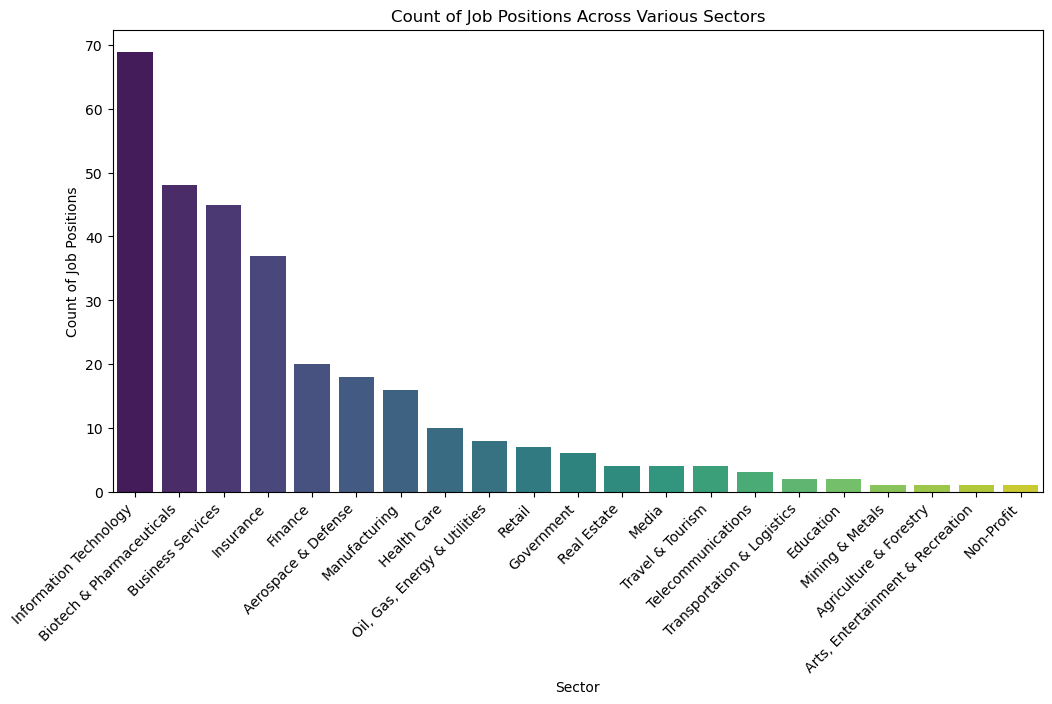

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sector', data=df, order=df['Sector'].value_counts().index, palette='viridis')
plt.title('Count of Job Positions Across Various Sectors')
plt.xlabel('Sector')
plt.ylabel('Count of Job Positions')
plt.xticks(rotation=45, ha='right')
plt.show()


from the above plot we can see that Information Technolog and Biotech & Pharmaceuticals have most job positions.

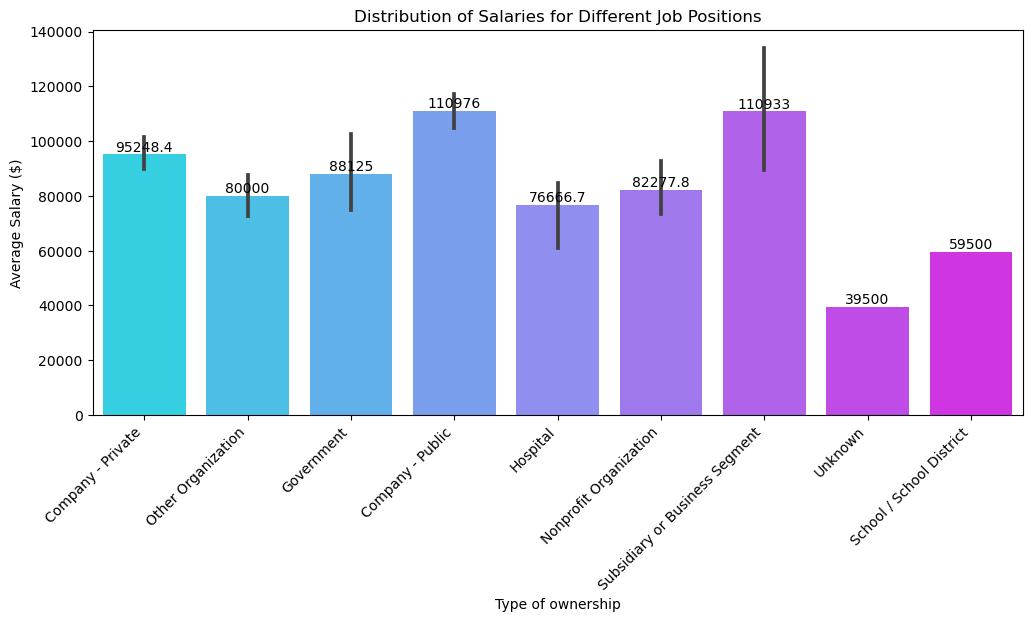

In [40]:
plt.figure(figsize=(12, 5))
aa=sns.barplot(y='Average Salary', x='Type of ownership', data=df, palette='cool')
for bars in aa.containers:
    aa.bar_label(bars)
plt.title('Distribution of Salaries for Different Job Positions')
plt.ylabel('Average Salary ($)')
plt.xlabel('Type of ownership')
plt.xticks(rotation=45, ha='right')
plt.show()

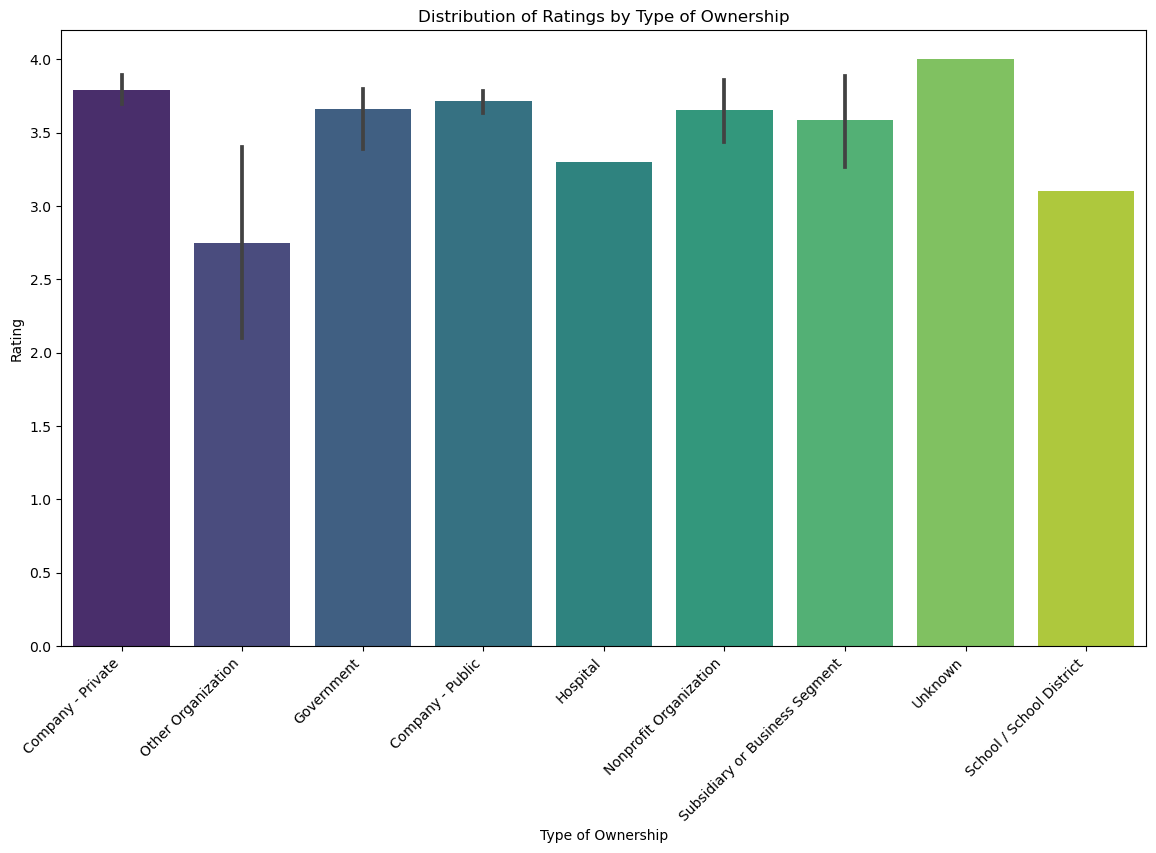

In [41]:
plt.figure(figsize=(14, 8))
a=sns.barplot(x='Type of ownership', y='Rating', data=df, palette='viridis')

plt.title('Distribution of Ratings by Type of Ownership')
plt.xlabel('Type of Ownership')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

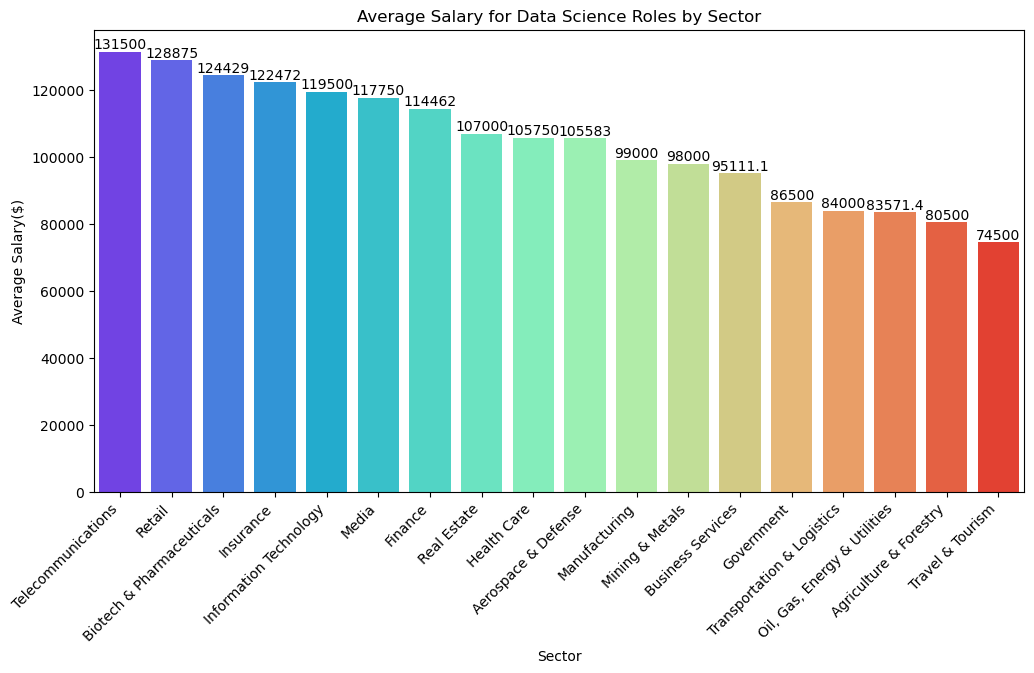

In [42]:
data_science_df = df[df['Job Title'].str.contains('Data Scientist|Data Science', case=False, regex=True)]

average_salary_by_sector = data_science_df.groupby('Sector')['Average Salary'].mean().sort_values(ascending= False)

plt.figure(figsize=(12, 6))
a=sns.barplot(y=average_salary_by_sector.values, x=average_salary_by_sector.index, palette='rainbow')
for bars in a.containers:
    a.bar_label(bars)
plt.title('Average Salary for Data Science Roles by Sector')
plt.ylabel('Average Salary($)')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.show()

# From the above plot we can see that, the Insurance and Telecommunications sector's data scientist have more average salary than any other sectors and the least is given by Travel and Tourism sector. 

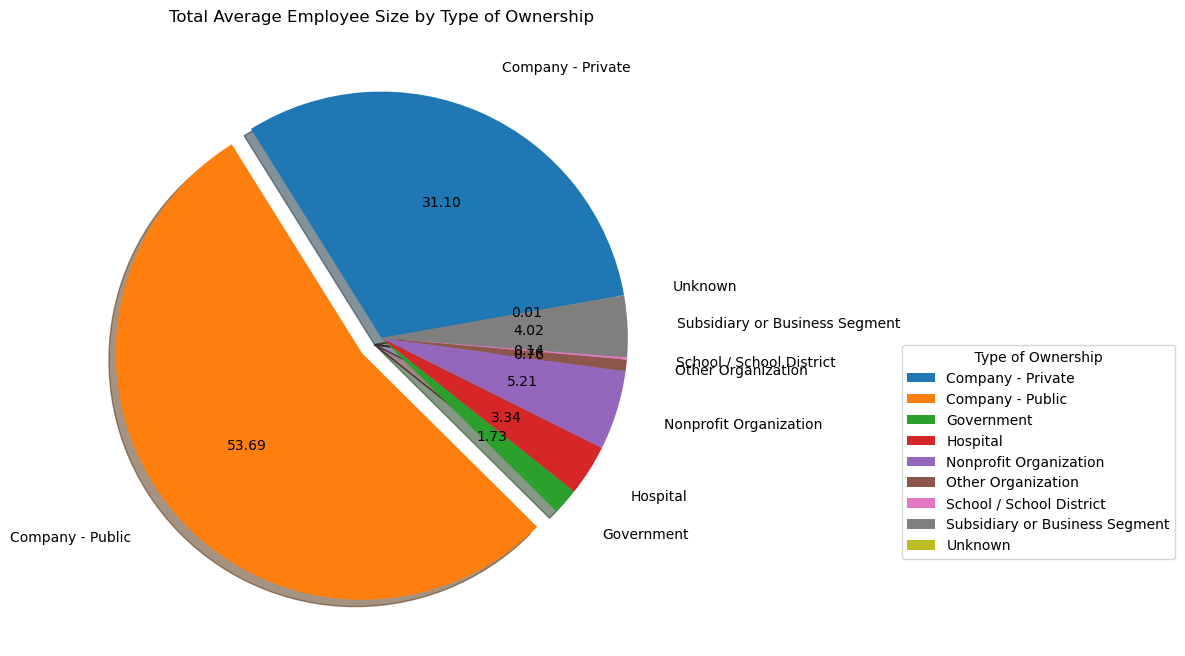

In [43]:
plt.figure(figsize=(8, 8))
explode1=[0,0.1,0,0,0,0,0,0,0]
plt.pie(for_pie, labels=for_pie.index,explode= explode1,autopct="%.2f",labeldistance=1.2,shadow=True, startangle=10)

plt.title('Total Average Employee Size by Type of Ownership')
plt.legend(title='    Type of Ownership    ',bbox_to_anchor=(1, 0.2, 0.8, 0.3))
plt.show()

# From the above plot we understand the average employees in the different of ownerships of the company, most is with public company followed by private company

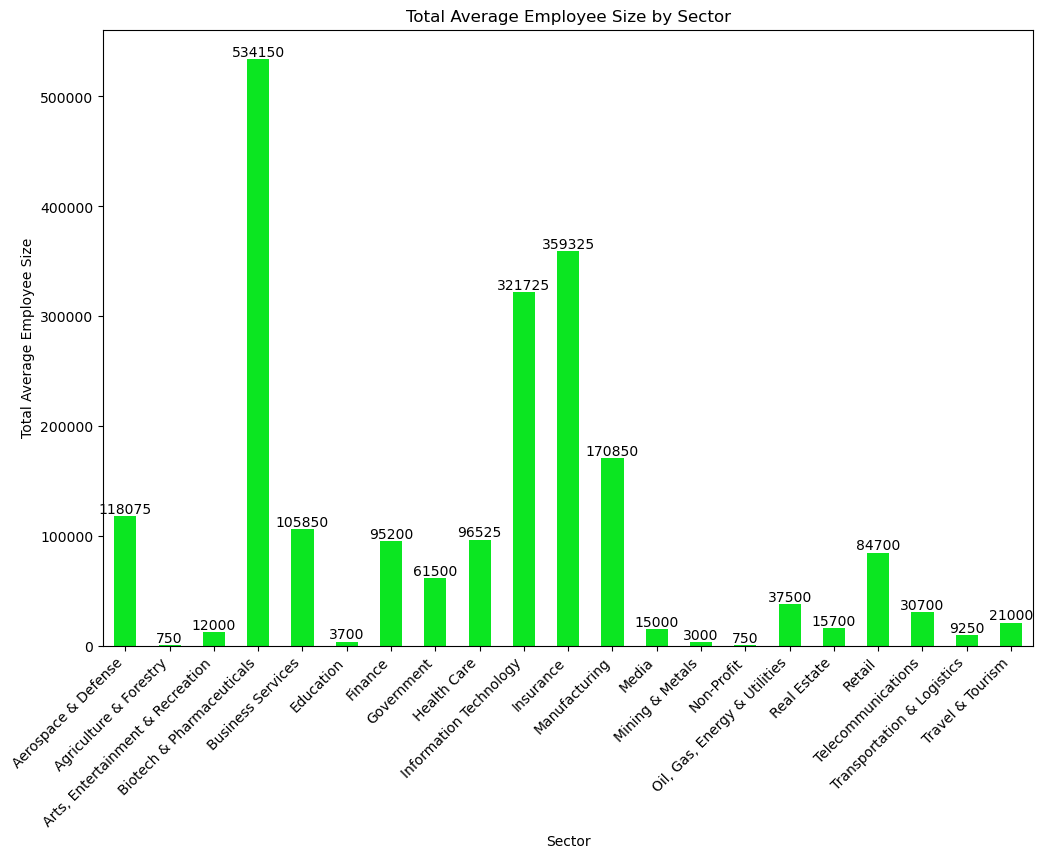

In [44]:
plt.figure(figsize=(12, 8))
xy=sec.plot(kind='bar', color='#0be621')
for bars in xy.containers:
    xy.bar_label(bars)
plt.title('Total Average Employee Size by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Average Employee Size')
plt.xticks(rotation=45, ha='right')
plt.show()

# In the Biotec & Pharmaceuticals sector has the maximum number of employees followed by Insurance

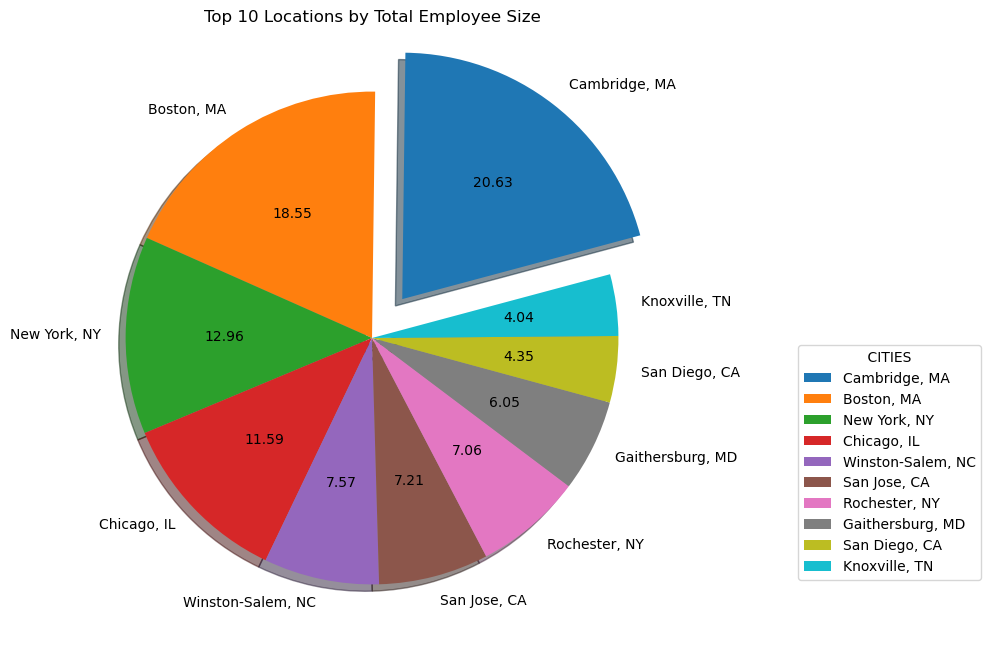

In [45]:
fig, ax = plt.subplots(figsize=(10, 8))
explode1=[0.2,0,0,0,0,0,0,0,0,0]
ax.pie(top10, labels=top10.index,explode=explode1, startangle=15,labeldistance=1.1,shadow=True, autopct="%.2f")

plt.title('Top 10 Locations by Total Employee Size')
plt.legend(title='    CITIES    ',bbox_to_anchor=(0.7, 0.2, 0.8, 0.3)) 
plt.show()

# cambridge has the maximum number of employees followed by boston and surprisingly New york came after that.